# Part 3. Model Building and Evaluation
-------------------------------------------------------------------------------------------------------------------

## Ensemble Learning

### 1) Data Preparation

In [5]:
# Import libraries and load cleansed sample dataset
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


loans_sampled = pd.read_csv("./dataset/loans_cleansed_sample.csv")

# loans_sampled = pd.read_csv("./dataset/loans_cleansed_sample.csv",
#                            usecols = ['recoveries', 'inq_last_6mths', 'int_rate', 
#                                       'total_pymnt', 'loan_amnt', 'dti', 'revol_util', 
#                                       'annual_inc', 'default_loan'])
loans_sampled.shape

# Steps: 1) Split --> 2) Scaling --> 3) SMOTE --> 4) PCA reduction
# 1) Splitting 
from sklearn.model_selection import train_test_split
y = loans_sampled['default_loan']
X = loans_sampled.drop('default_loan', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2019)

# 2) Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # mean : 0, standard deviation : 1
sc.fit(X_train) # fit only a train dataset
X_train = sc.transform(X_train)
X_test = sc.transform(X_test) # Do not fit a test dataset

# 3) Oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2020)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

### 2) Build and Evaluate Ensemble Model

K-Nearest Neighbours: 0.8839111803661862
Random Forest: 0.9267627580833658
Support Vector Machine: 0.9002726918582002
Majority Voting Ensemble: 0.9072847682119205


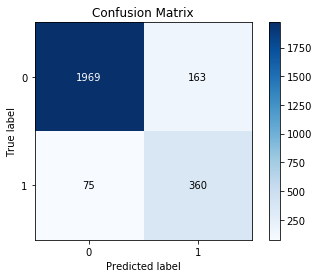

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2132
           1       0.69      0.83      0.75       435

    accuracy                           0.91      2567
   macro avg       0.83      0.88      0.85      2567
weighted avg       0.92      0.91      0.91      2567



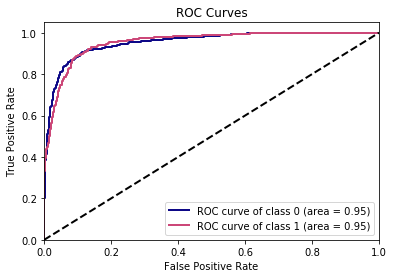

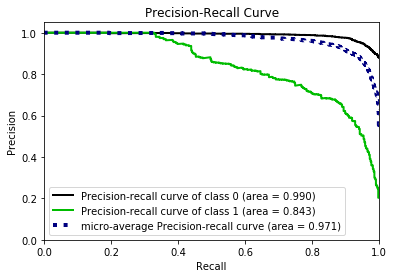

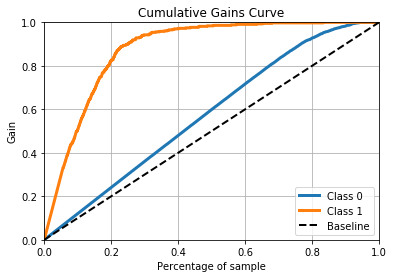

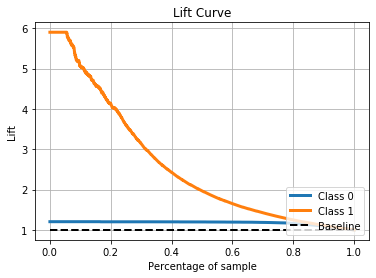

In [6]:
# Import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn import svm
import pickle

# Saved Model files
file_knn = './models/final_Model_KNN.sav'
file_rf = './models/final_Model_RF.sav'
file_svm = './models/final_Model_SVM.sav'

# Load the model from disk
model_knn = pickle.load(open(file_knn, 'rb'))
model_rf = pickle.load(open(file_rf, 'rb'))
model_svm = pickle.load(open(file_svm, 'rb'))

# Create a dictionary of models
estimators = [('knn', model_knn), ('rf', model_rf), ('svm', model_svm)]

# Create a voting classifier, inputting models
ensemble = VotingClassifier(estimators, voting='soft')
# ensemble = VotingClassifier(estimators, voting='hard')

# Fit model to training dataset
ensemble.fit(X_train, y_train)

# Test the three models with the test data and print accuracy scores
print('K-Nearest Neighbours: {}'.format(model_knn.score(X_test, y_test)))
print('Random Forest: {}'.format(model_rf.score(X_test, y_test)))
print('Support Vector Machine: {}'.format(model_svm.score(X_test, y_test)))
print('Majority Voting Ensemble: {}'.format(ensemble.score(X_test, y_test)))

# Test the model with the test dataset
prediction = ensemble.predict(X_test)
probas = ensemble.predict_proba(X_test)

# Check performance of the model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import scikitplot as skplt 

# print("\n\n----------------- Ensemble Performance -----------------")
skplt.metrics.plot_confusion_matrix(y_test, prediction)
plt.show()
print(classification_report(y_test, prediction))

# Draw the ROC curve
skplt.metrics.plot_roc(y_test, probas, cmap = 'plasma', plot_micro = False, plot_macro = False)
plt.show()

# Precision-Recall Curve validation
skplt.metrics.plot_precision_recall(y_test, probas)
plt.show()
# Cumulative gain Curve
skplt.metrics.plot_cumulative_gain(y_test, probas)
skplt.metrics.plot_lift_curve(y_test, probas)
plt.show()

### References and key interpretations of the experiment will be revised. 30 Nov 2019

Harvard Style(Check it out), Bibliograph <br>
Chicago style: citing a website or web page! Harvard style?<br><br>
London School of Economics and Political Science. 2005, June 6. The Identity Card Bill debate: what model might work? http://www.lse.ac.uk/collections/pressAndInformationOffice/newsAndEvents/archives/2005/ID_Card_update.htm (accessed 9 June 2005)